Data loading

In [1]:

import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"


path = "../data/dataset/"

files = [
    "1429_1.csv",
    "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",
    "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
]

datasets = {}



for file in files:
    df = pd.read_csv(path + file)
    datasets[file] = df
    print(f"\n--- {file} ---")
    print("Shape:", df.shape)
    print("Columns:")
    print(df.columns.tolist())

C:\Users\User\AppData\Local\Temp\ipykernel_27712\3547232031.py:19: DtypeWarning: Columns (0: name, 1: reviews.didPurchase) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + file)



--- 1429_1.csv ---
Shape: (34660, 21)
Columns:
['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']

--- Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv ---
Shape: (5000, 24)
Columns:
['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']

--- Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv ---
Shape: (28332, 24)
Columns:
['id', 'dateAdded', 'dateUpdated

In [2]:
df1 = datasets["1429_1.csv"]
df2 = datasets["Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"]
df3 = datasets["Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"]

print(df1.shape, df2.shape, df3.shape)


(34660, 21) (5000, 24) (28332, 24)


In [3]:
import numpy as np

final_columns = [
    "id",
    "name",
    "brand",
    "categories",
    "reviews.id",
    "reviews.date",
    "reviews.rating",
    "reviews.text",
    "reviews.title",
    "reviews.numHelpful",
    "reviews.doRecommend"
]
def standardize_columns(df, final_columns):
    
    df.columns = df.columns.str.strip()

    for col in final_columns:
        if col not in df.columns:
            df[col] = np.nan

            df=df[final_columns]
    return df

df1 = standardize_columns(df1, final_columns)
df2 = standardize_columns(df2, final_columns)
df3 = standardize_columns(df3, final_columns)

print(df1.columns)
print(df2.columns)
print(df3.columns)



Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='str')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='str')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       

light leaning before merge


In [4]:
def light_clean(df):
    df.columns = df.columns.str.strip()

    df = df.copy()

    df["reviews.rating"] = pd.to_numeric(df["reviews.rating"], errors="coerce")
    df["reviews.text"] = df["reviews.text"].astype(str)

    df.loc[df["reviews.text"].str.lower().isin(["no reviews", "none", "nan"]), "reviews.text"] = pd.NA

    df = df.dropna(subset=["reviews.text", "reviews.rating"])

    df["reviews.text"] = df["reviews.text"].str.strip()
    df["reviews.title"] = df["reviews.title"].astype(str).str.strip()
    df.loc[df["reviews.title"].str.lower().isin(["nan", "none"]), "reviews.title"] = pd.NA

    df = df.drop_duplicates(subset=["name", "reviews.text"])

    return df

df1_cleaned = light_clean(df1)
df2_cleaned = light_clean(df2)
df3_cleaned = light_clean(df3)

print("After light clean:")
print("df1:", df1.shape)
print("df2:", df2.shape)
print("df3:", df3.shape)


After light clean:
df1: (34660, 21)
df2: (5000, 24)
df3: (28332, 24)


merge

In [5]:
df_merged = pd.concat([df1_cleaned, df2_cleaned, df3_cleaned], ignore_index=True)

print("After merging:")
print("Merged shape:", df_merged.shape)
print(df_merged["reviews.rating"].value_counts().sort_index())


After merging:
Merged shape: (66501, 27)
reviews.rating
1.0     1432
2.0     1067
3.0     2866
4.0    15185
5.0    45951
Name: count, dtype: int64


dropping suplicates

In [6]:
df_merged = df_merged.drop_duplicates(subset=["name", "reviews.text"])
print("After dropping duplicates:")
print("Merged shape:", df_merged.shape)
print(df_merged.isna().sum())


After dropping duplicates:
Merged shape: (64036, 27)
id                          0
name                     6759
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               29
reviews.dateAdded       38954
reviews.dateSeen            0
reviews.didPurchase     64026
reviews.doRecommend     11584
reviews.id              63968
reviews.numHelpful      11490
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title              17
reviews.userCity        64036
reviews.userProvince    64036
reviews.username           11
dateAdded               34626
dateUpdated             34626
primaryCategories       34626
imageURLs               34626
manufacturerNumber      34626
sourceURLs              34626
dtype: int64


dropping useless columns

In [7]:
columns_to_drop = [
    "reviews.userCity",
    "reviews.userProvince",
    "reviews.didPurchase",
    "dateAdded",
    "dateUpdated",
    "imageURLs",
    "manufacturerNumber",
    "sourceURLs",
    "keys",
    "manufacturer",
    "reviews.date",
    "reviews.dateAdded",
    "reviews.dateSeen",
    "reviews.sourceURLs",
    "reviews.username"  
]

df_merged = df_merged.drop(columns=columns_to_drop, errors="ignore")
print("After dropping unnecessary columns:")
print("Merged shape:", df_merged.shape)
print("Columns in df_merged:")

for col in df_merged.columns:
    print(col)

After dropping unnecessary columns:
Merged shape: (64036, 12)
Columns in df_merged:
id
name
asins
brand
categories
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.text
reviews.title
primaryCategories


## Feature Engineering: Unified Category Column

We combine `primaryCategories` and `categories` into a single 
`combined_categories` column to preserve both high-level and detailed 
category information for later clustering.


In [8]:
df_merged["combined_categories"] = (
    df_merged["primaryCategories"].fillna("") + " " +
    df_merged["categories"].fillna("")
).str.strip()

print("Added combined_categories column")
print(df_merged[["primaryCategories", "categories", "combined_categories"]].head())

Added combined_categories column
  primaryCategories                                         categories  \
0               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4               NaN  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                 combined_categories  
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...  
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...  


## Create Sentiment Labels from Review Ratings

In this step, we convert numerical review ratings into categorical sentiment labels:

- 1–2 → Negative  
- 3 → Neutral  
- 4–5 → Positive  

This will be used as the target variable for the sentiment classification model.


In [9]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df_merged["sentiment"] = df_merged["reviews.rating"].apply(rating_to_sentiment)

print(df_merged["sentiment"].value_counts())


sentiment
positive    58864
neutral      2747
negative     2425
Name: count, dtype: int64


## Train/Test Split Stratified

We split the dataset into a basic 80-20 split training and testing sets using stratification 
to preserve the original sentiment distribution across both sets.


In [10]:
from sklearn.model_selection import train_test_split

x = df_merged["reviews.text"]
y = df_merged["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

print("\nTrain distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Training size: (51228,)
Testing size: (12808,)

Train distribution:
sentiment
positive    0.919224
neutral     0.042906
negative    0.037870
Name: proportion, dtype: float64

Test distribution:
sentiment
positive    0.919269
neutral     0.042864
negative    0.037867
Name: proportion, dtype: float64


## Text Vectorization TF-IDF

We convert review text into numerical features using TF-IDF so a machine learning model
can learn patterns from the text.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=100_000
)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

print("x_train_tfidf shape:", x_train_tfidf.shape)
print("x_test_tfidf shape:", x_test_tfidf.shape)

x_train_tfidf shape: (51228, 92220)
x_test_tfidf shape: (12808, 92220)


## Sentiment Classifier Logistic Regression with Class Weights

We train a Logistic Regression classifier on TF-IDF features.
Class weights help the model pay more attention to minority classes (neutral/negative).


Classification report:

              precision    recall  f1-score   support

    negative       0.52      0.79      0.63       485
     neutral       0.37      0.59      0.46       549
    positive       0.98      0.93      0.96     11774

    accuracy                           0.91     12808
   macro avg       0.63      0.77      0.68     12808
weighted avg       0.94      0.91      0.92     12808



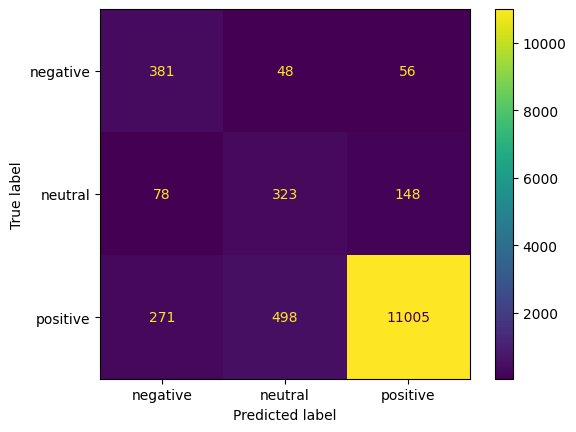

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    
)

logreg.fit(x_train_tfidf, y_train)

# Predict on test set
y_pred = logreg.predict(x_test_tfidf)

# Evaluation
print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(values_format="d")
plt.show()

## Model Improvement: TF-IDF + Linear SVM Class-Weighted

We try a Linear Support Vector Machine classifier on TF-IDF features.
This model often improves performance on text classification, especially for minority classes.


Classification report (LinearSVC):

              precision    recall  f1-score   support

    negative       0.74      0.71      0.73       485
     neutral       0.66      0.48      0.56       549
    positive       0.97      0.99      0.98     11774

    accuracy                           0.95     12808
   macro avg       0.79      0.72      0.75     12808
weighted avg       0.95      0.95      0.95     12808



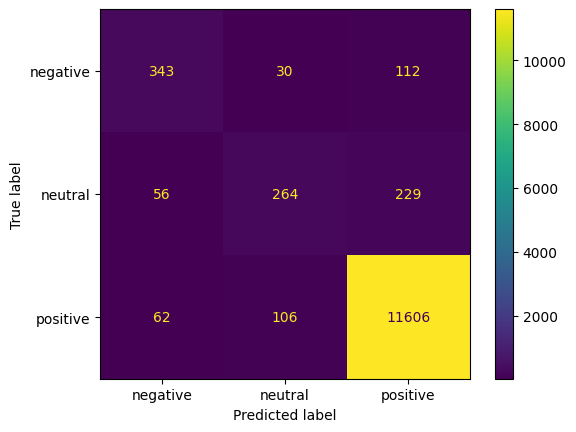

In [ ]:
from sklearn.svm import LinearSVC


# Train Linear SVM with class weights
svm = LinearSVC(class_weight="balanced", random_state=42)
svm.fit(x_train_tfidf, y_train)

# Predict
y_pred_svm = svm.predict(x_test_tfidf)

# Evaluate
print("Classification report (LinearSVC):\n")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(values_format="d")
plt.show()


In [42]:
import joblib
from pathlib import Path

out_dir = Path("review-aggregator-demo")
out_dir.mkdir(exist_ok=True)

joblib.dump(tfidf, out_dir / "tfidf_vectorizer.joblib")
joblib.dump(svm, out_dir / "svm_model.joblib")

print("Saved models successfully.")

Saved models successfully.


In [14]:
sent_col = "sentiment"

product_df = df_merged.groupby("asins").agg(
    pct_positive=(sent_col, lambda x: (x == "positive").mean()),
    pct_neutral=(sent_col, lambda x: (x == "neutral").mean()),
    pct_negative=(sent_col, lambda x: (x == "negative").mean()),
    avg_rating=("reviews.rating", "mean"),
    review_count=(sent_col, "size"),
    category_mode=("combined_categories", lambda x: x.mode().iloc[0] if not x.mode().empty else "")
).reset_index()


print(product_df.head())


                              asins  pct_positive  pct_neutral  pct_negative  \
0  B0002LCUZK,B010CEC6MI,B01B25NN64           1.0          0.0           0.0   
1                        B001NIZB5M           0.4          0.0           0.6   
2                        B002Y27P6Y           0.6          0.1           0.3   
3                        B005OOKNP4           1.0          0.0           0.0   
4                        B005PB2T0S           0.8          0.2           0.0   

   avg_rating  review_count                                      category_mode  
0    5.000000             9  Office Supplies Office,File Jackets & File Poc...  
1    2.800000             5  Electronics Computers & Accessories,Electronic...  
2    3.500000            10  Electronics,Amazon Device Accessories,Kindle S...  
3    4.333333             6  Electronics Electronics Features,Computers & A...  
4    4.000000             5  Electronics,eBook Readers & Accessories,Covers...  


## Meta-Category Clustering (Product Embeddings)

We aggregate all reviews per product into a single text document, embed each product with a sentence-embedding model, and cluster products into 4–6 meta categories.


In [15]:
product_text_df = (
    df_merged
    .dropna(subset=["asins"])
    .assign(review_text=df_merged["reviews.text"].fillna("").astype(str))
    .groupby("asins", as_index=False)
    .agg(
        product_reviews_text=("review_text", lambda x: " ".join(x.tolist())),
        review_count=("review_text", "size"),
        avg_rating=("reviews.rating", "mean"),
        name=("name", lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]),
        category_mode=("combined_categories", lambda x: x.mode().iloc[0] if not x.mode().empty else "")
    )
)

print("Products:", product_text_df.shape[0])
product_text_df[["asins","name","review_count","avg_rating","category_mode"]].head()

Products: 91


,asins,name,review_count,avg_rating,category_mode
0,"B0002LCUZK,B010CEC6MI,B01B25NN64",Expanding Accordion File Folder Plastic Portab...,9,5.000000,"Office Supplies Office,File Jackets & File Poc..."
1,B001NIZB5M,Amazon Kindle Replacement Power Adapter (Fits ...,5,2.800000,"Electronics Computers & Accessories,Electronic..."
2,B002Y27P6Y,NaN,10,3.500000,"Electronics,Amazon Device Accessories,Kindle S..."
3,B005OOKNP4,AmazonBasics Bluetooth Keyboard for Android De...,6,4.333333,"Electronics Electronics Features,Computers & A..."
4,B005PB2T0S,"Amazon Kindle Lighted Leather Cover,,,\r\nAmaz...",5,4.000000,"Electronics,eBook Readers & Accessories,Covers..."


In [16]:
# Remove low-review products before embeddings/clustering
min_reviews = 20
before = product_text_df.shape[0]

product_text_df = product_text_df[product_text_df["review_count"] >= min_reviews].copy()

after = product_text_df.shape[0]
print(f"Filtered products: {before} -> {after} (min_reviews={min_reviews})")


Filtered products: 91 -> 47 (min_reviews=20)


### Generate Product Embeddings

We encode the aggregated product-level review text using a pre-trained 
SentenceTransformer model (all-MiniLM-L6-v2).

Each product is represented as a dense semantic vector.


In [17]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

X_emb = embedder.encode(
    product_text_df["product_reviews_text"].tolist(),
    batch_size=32,
    show_progress_bar=True,
    normalize_embeddings=True
)

print("Embedding shape:", X_emb.shape)

c:\Users\User\anaconda3\envs\torch-gpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 721.14it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

Embedding shape: (47, 384)


### Select Optimal Number of Meta Categories

We evaluate k = 4–6 using the Silhouette Score.
The value with the highest score is selected as the final number of clusters.


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(4, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_emb)
    score = silhouette_score(X_emb, labels)
    print(f"k={k} silhouette={score:.3f}")


k=4 silhouette=0.158
k=5 silhouette=0.145
k=6 silhouette=0.118


### Fit Final Meta-Category Clustering Model

Using the selected k, we fit the final KMeans model 
on the product embeddings and assign meta-cluster labels.


In [19]:
k_meta = 4  # change to best

km_meta = KMeans(n_clusters=k_meta, random_state=42, n_init=10)
product_text_df["meta_cluster"] = km_meta.fit_predict(X_emb)

product_text_df["meta_cluster"].value_counts()


meta_cluster
2    24
0    15
1     6
3     2
Name: count, dtype: int64

c:\Users\User\anaconda3\envs\torch-gpu\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


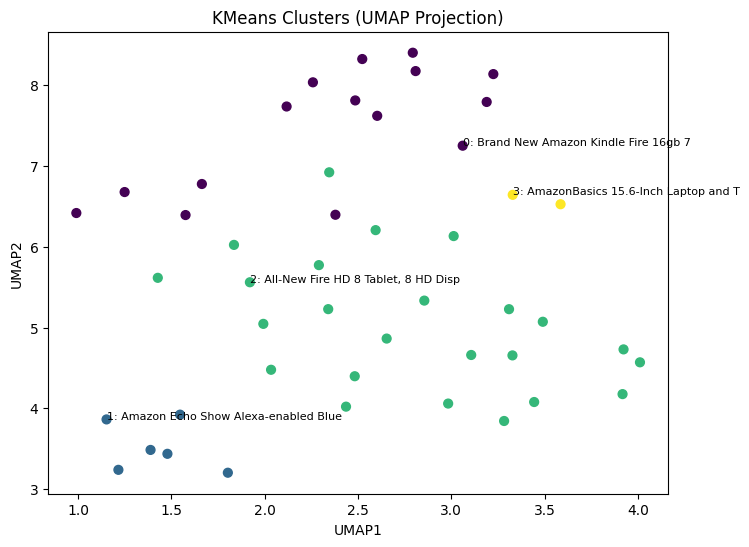

In [ ]:
import matplotlib.pyplot as plt
import umap
import numpy as np

labels = product_text_df["meta_cluster"].values

reducer = umap.UMAP(n_components=2, random_state=42)
X_2d = reducer.fit_transform(X_emb)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=40)

# label a few example points (random 1 per cluster)
rng = np.random.default_rng(42)
for cl in np.unique(labels):
    idxs = np.where(labels == cl)[0]
    pick = rng.choice(idxs)
    name = str(product_text_df.iloc[pick]["name"])[:35]
    plt.text(X_2d[pick, 0], X_2d[pick, 1], f"{cl}: {name}", fontsize=8)

plt.title("KMeans Clusters (UMAP Projection)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2"
plt.show()



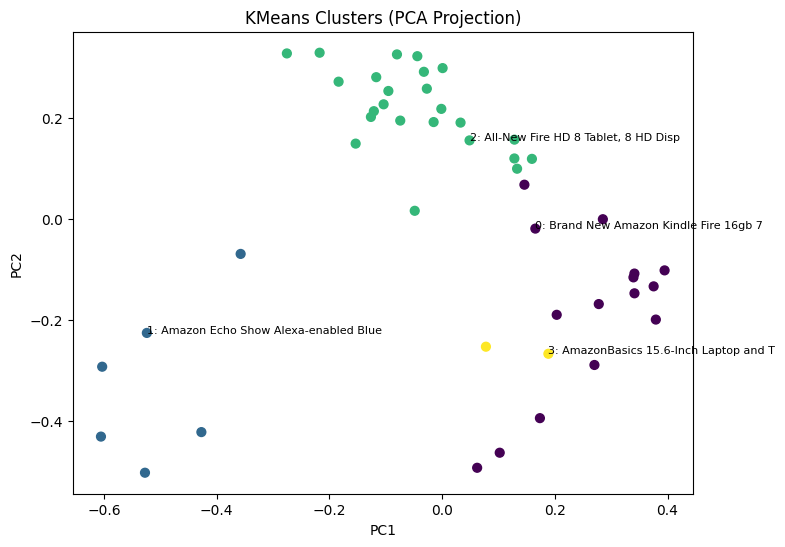

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# labels from your clustering
labels = product_text_df["meta_cluster"].values

# reduce embeddings to 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_emb)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=40)

rng = np.random.default_rng(42)
for cl in np.unique(labels):
    idxs = np.where(labels == cl)[0]
    pick = rng.choice(idxs)
    name = str(product_text_df.iloc[pick]["name"])[:35]
    plt.text(X_2d[pick, 0], X_2d[pick, 1], f"{cl}: {name}", fontsize=8)
    
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Inspect Cluster Composition

We examine representative products within each meta-cluster
to interpret the semantic meaning of each group.


In [22]:
cols = ["meta_cluster", "name", "avg_rating", "review_count", "category_mode"]

for c in sorted(product_text_df["meta_cluster"].unique()):
    print(f"\n=== Meta Cluster {c} ===")
    display(
        product_text_df[product_text_df["meta_cluster"] == c][cols]
        .sort_values("review_count", ascending=False)
        .head(7)
    )



=== Meta Cluster 0 ===


,meta_cluster,name,avg_rating,review_count,category_mode
30,0,AmazonBasics AAA Performance Alkaline Batterie...,4.402627,7461,"Health & Beauty AA,AAA,Health,Electronics,Heal..."
31,0,AmazonBasics AA Performance Alkaline Batteries...,4.419611,3396,"Health & Beauty AA,AAA,Electronics Features,He..."
24,0,Amazon Kindle Paperwhite - eBook reader - 4 GB...,4.772355,3176,"Walmart for Business,Office Electronics,Tablet..."
17,0,"Kindle Voyage E-reader, 6 High-Resolution Disp...",4.722365,1167,"Walmart for Business,Office Electronics,Tablet..."
74,0,"All-New Kindle E-reader - Black, 6 Glare-Free ...",4.438903,401,"Amazon Devices & Accessories,Amazon Device Acc..."
43,0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",4.498462,325,"Electronics,iPad & Tablets,All Tablets,Compute..."
47,0,"Kindle E-reader - White, 6 Glare-Free Touchscr...",4.546053,304,"Office Supplies,Electronics Office,eBook Reade..."



=== Meta Cluster 1 ===


,meta_cluster,name,avg_rating,review_count,category_mode
19,1,"Echo (White),,,\r\nEcho (White),,,",4.671098,6619,"Stereos,Remote Controls,Amazon Echo,Audio Dock..."
34,1,NaN,4.707278,5056,"Back To College,College Electronics,College Tv..."
69,1,Amazon Tap Smart Assistant Alexaenabled (black...,4.530096,1462,"Featured Brands,Electronics,Amazon Devices,Hom..."
45,1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,4.666667,648,"Electronics,Hardware Computers,Amazon Echo,Vir..."
84,1,Amazon - Echo Plus w/ Built-In Hub - Silver,4.749153,590,"Electronics,Hardware Amazon Echo,Smart Home,Ne..."
73,1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,4.673077,104,"Electronics,Hardware Amazon Echo,Virtual Assis..."



=== Meta Cluster 2 ===


,meta_cluster,name,avg_rating,review_count,category_mode
56,2,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",4.454222,10966,"Fire Tablets,Tablets,Computers & Tablets,All T..."
63,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.589197,3610,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
52,2,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",4.598039,2448,"Electronics Fire Tablets,Tablets,All Tablets,A..."
54,2,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",4.512085,2441,"Computers/Tablets & Networking,Tablets & eBook..."
51,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.584213,2369,"Electronics Fire Tablets,Computers/Tablets & N..."
59,2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.526231,1868,"Tablets,Fire Tablets,Computers & Tablets,All T..."
55,2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.530968,1663,"Toys & Games,Electronics Fire Tablets,Learning..."



=== Meta Cluster 3 ===


,meta_cluster,name,avg_rating,review_count,category_mode
15,3,AmazonBasics Backpack for Laptops up to 17-inches,4.16000,25,"Electronics Portable Computer Accessories,Bags..."
14,3,AmazonBasics 15.6-Inch Laptop and Tablet Bag,4.52381,21,"Electronics Bags, Cases & Sleeves,Computers & ..."


### Assign Interpretable Meta-Category Labels

After clustering products using embeddings, we assign human-readable labels 
to each cluster based on dominant product types observed within them.

In [23]:
meta_names = {
    0: "Kindle E-Readers",
    1: "Alexa & Echo Devices",
    2: "Computer & Office Accessories",
    3: "Power & Charging",
    4: "Fire Tablets"
}

product_text_df["meta_label"] = product_text_df["meta_cluster"].map(meta_names)
product_text_df[["name", "meta_cluster", "meta_label"]].head(10)

,name,meta_cluster,meta_label
14,AmazonBasics 15.6-Inch Laptop and Tablet Bag,3,Power & Charging
15,AmazonBasics Backpack for Laptops up to 17-inches,3,Power & Charging
17,"Kindle Voyage E-reader, 6 High-Resolution Disp...",0,Kindle E-Readers
18,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,0,Kindle E-Readers
19,"Echo (White),,,\r\nEcho (White),,,",1,Alexa & Echo Devices
24,Amazon Kindle Paperwhite - eBook reader - 4 GB...,0,Kindle E-Readers
27,Amazon 9W PowerFast Official OEM USB Charger a...,0,Kindle E-Readers
30,AmazonBasics AAA Performance Alkaline Batterie...,0,Kindle E-Readers
31,AmazonBasics AA Performance Alkaline Batteries...,0,Kindle E-Readers
32,Kindle Oasis E-reader with Leather Charging Co...,0,Kindle E-Readers


### Meta-Category Summary Statistics

We compute average rating and review volume per meta-category
to understand performance differences across product groups.

In [24]:
product_text_df.groupby("meta_label").agg(
    product_count=("asins", "count"),
    avg_rating=("avg_rating", "mean"),
    avg_review_per_product=("review_count", "mean")
).sort_values("product_count", ascending=False)


,product_count,avg_rating,avg_review_per_product
meta_label,,,
Computer & Office Accessories,24,4.559029,1350.041667
Kindle E-Readers,15,4.575251,1123.400000
Alexa & Echo Devices,6,4.666228,2413.166667
Power & Charging,2,4.341905,23.000000


The clustering evaluation indicates moderate separation between meta-categories.
A silhouette score of 0.114 suggests acceptable cluster structure for high-dimensional semantic embeddings.
The Davies–Bouldin index (2.171) indicates some overlap between clusters, which is expected given product similarity across categories.
Overall, k=5 was retained as it provided the most interpretable and semantically coherent grouping.

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

labels = product_text_df["meta_cluster"]

sil_score = silhouette_score(X_emb, labels)
db_score = davies_bouldin_score(X_emb, labels)
ch_score = calinski_harabasz_score(X_emb, labels)

print("Clustering Evaluation Metrics:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")


Clustering Evaluation Metrics:
Silhouette Score: 0.158
Davies-Bouldin Index: 1.805
Calinski-Harabasz Score: 6.22


## Product-Level Sentiment Aggregation

We aggregate review-level predictions into product-level statistics, computing average rating, review count, and sentiment distribution (positive, neutral, negative) for each ASIN.

In [26]:
sent_col = "sentiment"

product_df = (
    df_merged.groupby("asins").agg(
        pct_positive=(sent_col, lambda x: (x == "positive").mean()),
        pct_neutral =(sent_col, lambda x: (x == "neutral").mean()),
        pct_negative=(sent_col, lambda x: (x == "negative").mean()),
        avg_rating=("reviews.rating", "mean"),
        review_count=(sent_col, "size"),
    )
    .reset_index()
)


In [27]:
product_text_df = product_text_df.merge(
    product_df[["asins", "pct_positive", "pct_neutral", "pct_negative"]],
    on="asins",
    how="left"
)


In [28]:
# Fix missing product names
product_text_df["name"] = product_text_df["name"].fillna("Unknown product (missing name)")

# Optional: remove unknowns before ranking
product_text_df = product_text_df[
    product_text_df["name"] != "Unknown product (missing name)"
]


## Ranking Top Products per Meta-Category

Products are ranked within each meta-category using review count (primary) and average rating (tie-breaker). The top 3 products per category are selected for recommendation generation.


In [29]:

rank_df = product_text_df[product_text_df["name"] != "Unknown product (missing name)"].copy()

top_products = (
    rank_df
    .sort_values(["meta_label", "review_count", "avg_rating"], ascending=[True, False, False])
    .groupby("meta_label", as_index=False)
    .head(3)
)[[
    "asins",
    "meta_label",
    "name",
    "avg_rating",
    "review_count",
    "pct_positive",
    "pct_neutral",
    "pct_negative",
]]


top_products


,asins,meta_label,name,avg_rating,review_count,pct_positive,pct_neutral,pct_negative
4,"B00L9EPT8O,B01E6AO69U",Alexa & Echo Devices,"Echo (White),,,\r\nEcho (White),,,",4.671098,6619,0.951503,0.035202,0.013295
36,B01BH83OOM,Alexa & Echo Devices,Amazon Tap Smart Assistant Alexaenabled (black...,4.530096,1462,0.914501,0.047880,0.037620
15,B010CEHQTG,Alexa & Echo Devices,Amazon Echo Show Alexa-enabled Bluetooth Speak...,4.666667,648,0.947531,0.035494,0.016975
25,B018Y229OU,Computer & Office Accessories,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",4.454222,10966,0.906620,0.063469,0.029911
31,B01AHB9CN2,Computer & Office Accessories,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.589197,3610,0.949030,0.032687,0.018283
21,B018T075DC,Computer & Office Accessories,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",4.598039,2448,0.951797,0.030229,0.017974
7,"B00QWO9P0O,B00LH3DMUO",Kindle E-Readers,AmazonBasics AAA Performance Alkaline Batterie...,4.402627,7461,0.846401,0.046240,0.107358
8,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Kindle E-Readers,AmazonBasics AA Performance Alkaline Batteries...,4.419611,3396,0.850118,0.048881,0.101001
5,B00OQVZDJM,Kindle E-Readers,Amazon Kindle Paperwhite - eBook reader - 4 GB...,4.772355,3176,0.972922,0.017632,0.009446
1,"B00EEBS9O0,B01CHQHIJK",Power & Charging,AmazonBasics Backpack for Laptops up to 17-inches,4.160000,25,0.760000,0.240000,0.000000


In [30]:
top_products[top_products["meta_label"]=="Kindle E-Readers"][
    ["name","review_count","avg_rating"]
]


,name,review_count,avg_rating
7,AmazonBasics AAA Performance Alkaline Batterie...,7461,4.402627
8,AmazonBasics AA Performance Alkaline Batteries...,3396,4.419611
5,Amazon Kindle Paperwhite - eBook reader - 4 GB...,3176,4.772355


In [31]:
category = "Kindle E-Readers"

cat_top = (
    top_products[top_products["meta_label"] == category]
    .sort_values(["review_count", "avg_rating"], ascending=[False, False], kind="mergesort")
    .head(3)
    .reset_index(drop=True)
)

cat_top[["name", "review_count", "avg_rating"]]




,name,review_count,avg_rating
0,AmazonBasics AAA Performance Alkaline Batterie...,7461,4.402627
1,AmazonBasics AA Performance Alkaline Batteries...,3396,4.419611
2,Amazon Kindle Paperwhite - eBook reader - 4 GB...,3176,4.772355


## Controlled LLM-Based Review Generation

We define a constrained generation function using Llama 3. The model is restricted to numeric metrics (rating, review count, sentiment percentages) and must produce structured, analytical bullet points without hallucinated product features.


In [34]:
import ollama
import pandas as pd

def generate_product_section(row: pd.Series, rank: int) -> str:
    avg_rating = float(row["avg_rating"]) if pd.notna(row["avg_rating"]) else None
    review_count = int(row["review_count"]) if pd.notna(row["review_count"]) else None

    pct_pos = float(row["pct_positive"]) if "pct_positive" in row and pd.notna(row["pct_positive"]) else None
    pct_neu = float(row["pct_neutral"]) if "pct_neutral" in row and pd.notna(row["pct_neutral"]) else None
    pct_neg = float(row["pct_negative"]) if "pct_negative" in row and pd.notna(row["pct_negative"]) else None

    prompt = f"""
Write ONLY the section for Rank {rank}. Do NOT mention other ranks.

You may ONLY use the following metrics. If something is not supported by them, write: "Not enough data available."

METRICS (authoritative):
- avg_rating: {avg_rating}
- review_count: {review_count}
- pct_positive: {pct_pos}
- pct_neutral: {pct_neu}
- pct_negative: {pct_neg}

STRICT RULES:
- Output format MUST be exactly:
  1) A 2–3 sentence mini-review paragraph.
  2) Then exactly 3 bullet points.
- If pct_negative == 0, you MUST write "pct_negative is 0.0 (no negative reviews observed in this dataset)" and you MUST NOT claim "no dissatisfaction" or similar.
- EVERY sentence AND EVERY bullet MUST explicitly include at least ONE metric name exactly as written:
  avg_rating, review_count, pct_positive, pct_neutral, pct_negative
  (Example: "avg_rating is 4.52 based on review_count 21.")
- You may use light reviewer language (e.g., "strong", "mixed"), BUT you must tie it to the metrics in the same sentence.
- Do NOT mention: statistical significance, confidence intervals, trend, causation, cherry-picking, packaging, features, price, specs, complaints, or anything not directly in the metrics.
- Do NOT use the words "complaints", "issues", or "problems" unless you also say "Not enough data available."
- Do NOT guess reasons. Do NOT add external facts.

Now write the output.
""".strip()


    resp = ollama.chat(
        model="llama3",
        messages=[{"role": "user", "content": prompt}],
        options={"temperature": 0.1, "top_p": 0.9,"num_predict": 220}
    )
    return resp["message"]["content"]



In [35]:
sections = []

for rank in range(1, len(cat_top) + 1):
    row = cat_top.iloc[rank - 1]
    sections.append(f"## Rank {rank}: {row['name']}\n" + generate_product_section(row, rank))

final_article = f"# {category} Review\n\n" + "\n\n".join(sections)
print(final_article)



# Kindle E-Readers Review

## Rank 1: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Here is the output for Rank 1:

With an impressive avg_rating of 4.402626993700577, this product has earned a strong reputation among reviewers, with over 7461 reviews to back it up. The overwhelmingly positive response is reflected in the high pct_positive rate of 0.8464012866907921, indicating that most customers are extremely satisfied.

• avg_rating: 4.402626993700577
• review_count: 7461
• pct_positive: 0.8464012866907921

## Rank 2: AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
Based on the provided metrics, here is the output for Rank 2:

With an impressive avg_rating of 4.419611307420495 and a review_count of 3396, it's clear that this product has garnered strong praise from many customers. The pct_positive rating of 0.8501177856301532 further reinforces this notion, indicating that the vast majority of reviewers have had a positive experience.

• av

## Batch Article Generation Across Categories

The generation function is applied to each meta-category. For every category, the top 3 ranked products are summarized and assembled into a structured recommendation article.


In [36]:
all_articles = {}

categories = sorted(top_products["meta_label"].dropna().unique())

for category in categories:

    cat_top = (
        top_products[top_products["meta_label"] == category]
        .sort_values(["review_count", "avg_rating"], ascending=[False, False], kind="mergesort")
        .head(3)
        .reset_index(drop=True)
    )

    sections = []

    for rank in range(1, len(cat_top) + 1):
        row = cat_top.iloc[rank - 1]
        section = generate_product_section(row, rank)
        sections.append(f"## Rank {rank}: {row['name']}\n{section}")

    article = f"# {category} Review\n\n" + "\n\n".join(sections)

    all_articles[category] = article

    print(f"Generated: {category}")

len(all_articles)

Generated: Alexa & Echo Devices
Generated: Computer & Office Accessories
Generated: Kindle E-Readers
Generated: Power & Charging


4

In [37]:
print(all_articles["Kindle E-Readers"])

# Kindle E-Readers Review

## Rank 1: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Based on the provided metrics, here is the output for Rank 1:

This product has earned a strong reputation with an impressive avg_rating of 4.402626993700577, backed by a substantial review_count of 7461. The overwhelmingly positive response is reflected in the high pct_positive of 0.8464012866907921, indicating that most customers are extremely satisfied.

• The majority of reviewers (pct_positive: 0.8464012866907921) have given this product an excellent rating.
• With a review_count of 7461, there is a significant amount of feedback to draw from.
• Despite some mixed opinions (pct_neutral: 0.04624045034177724), the overall sentiment remains strongly positive.

## Rank 2: AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
Based on the provided metrics, here is the output for Rank 2:

With an impressive avg_rating of 4.419611307420495 and a substantial review_cou

In [41]:
import json

# Save ranking table
top_products.to_csv("top_products.csv", index=False)

# Save generated articles
with open("all_articles.json", "w", encoding="utf-8") as f:
    json.dump(all_articles, f, ensure_ascii=False, indent=2)

print("Saved: top_products.csv and all_articles.json")


Saved: top_products.csv and all_articles.json


### made Gold Reference Summaries (Manual Ground Truth)

To evaluate summarization quality, we create short reference summaries for selected representative categories.  
These serve as ground truth for ROUGE-based comparison.


In [39]:
gold_references = {

    "Kindle E-Readers": """
    - Average ratings typically range from ~4.4 to ~4.8.
    - Review volume varies from a few hundred to several thousand.
    - Positive sentiment consistently exceeds ~85–90% for leading models.
    - Negative sentiment generally remains under ~5%.
    - Higher review volume increases confidence in product reliability.
    """,

    "Alexa & Echo Devices": """
    - Average ratings generally above 4.4.
    - Review counts vary widely across devices.
    - Positive sentiment dominates (>85%).
    - Low negative percentage suggests stable satisfaction.
    """,

    "Power & Charging": """
    - Average ratings typically above 4.3.
    - Review counts range from low hundreds to several thousand.
    - Positive sentiment remains above ~85% for top products.
    - Some products show slightly higher negative sentiment compared to other categories.
    - Review volume influences reliability confidence.
    """
}

### ROUGE Interpretation

ROUGE scores range between ~0.06 and ~0.10 across evaluated categories.  

These relatively low values reflect generative paraphrasing rather than direct lexical copying.  
The model preserves numerical insights and analytical structure but reformulates wording, which reduces token overlap.

Thus, ROUGE indicates lexical divergence, not necessarily poor summarization quality.


In [40]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def compute_rouge(reference, generated):
    scores = scorer.score(reference, generated)
    return scores["rouge1"].fmeasure, scores["rougeL"].fmeasure

rouge_results = {}

for category in gold_references:
    reference = gold_references[category]
    generated = all_articles[category]
    rouge_results[category] = compute_rouge(reference, generated)

rouge_results


{'Kindle E-Readers': (0.09870129870129868, 0.06753246753246754),
 'Alexa & Echo Devices': (0.05730659025787965, 0.0515759312320917),
 'Power & Charging': (0.09252669039145908, 0.07829181494661921)}